# **ANALISIS DATA - AIRBNB**

> Ini adalah latihan analisis data sebagai bahan evaluasi dari pembelajaran awal (*bootcamp preparation*) di Bootcamp AI - Computer Vision, INDONESIA AI.

## **Import Library yang Dibutuhkan**

In [81]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn')

## **Memuat Dataset dan Informasinya**

In [2]:
lokasi_data = '/content/drive/MyDrive/Dataset/airbnb.csv'
data = pd.read_csv(lokasi_data)

In [3]:
# lihat 5 data pertama
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
# lihat informasi keseluruhan
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
# lihat statistik deskriptif
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


## **Pembersihan Data**

### **Pilih kolom yang diperlukan untuk analisis dan hapus kolom yang tidak diperlukan**

> Kolom 'id', 'name', 'host_id', dan 'host_name' akan dihapus karena dianggap tidak begitu esensial untuk dianalisis.

In [6]:
data_modif = data.drop(['id', 'name', 'host_id', 'host_name'], axis='columns')

In [7]:
# lihat modifikasi dataset dengan beberapa kolom sudah dihapus
data_modif.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [8]:
# lihat informasi dataset yang sudah dimodifikasi tersebut
data_modif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   last_review                     38843 non-null  object 
 9   reviews_per_month               38843 non-null  float64
 10  calculated_host_listings_count  48895 non-null  int64  
 11  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5), object(

### **Memeriksa data-data yang kosong**

In [9]:
# memeriksa data yang kosong
data_modif.isnull().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### **Memeriksa duplikasi data**

In [10]:
data_modif.duplicated().sum()

0

### **Memanipulasi data kolom 'last_review'**

> * Data kolom 'last_review' berisi data tanggal.
* Ada 10052 data kosong pada kolom ini.
* Kemungkinan format tanggalnya ada yang berbeda.
* Data yang kosong diisi dengan metode pengisian sama dengan data di atasnya. Pengisian data dianggap di tanggal yang berdekatan dengan data sebelumnya.
* Format tanggal harus disamakan.



In [11]:
# lihat data kolom 'last_review'
data_modif[['last_review']].head(20)

,last_review
0,2018-10-19
1,2019-05-21
2,NaN
3,2019-07-05
4,2018-11-19
5,2019-06-22
6,2017-10-05
7,2019-06-24
8,2017-07-21
9,2019-06-09


In [12]:
# sekilas format tanggalnya sudah sama semua, tetap untuk memastikan, diatur formatnya supaya sama
# format diatur yyyy-mm-dd
data_modif['last_review'] = pd.to_datetime(data_modif['last_review'], format='%Y-%m-%d')

In [13]:
# memeriksa modifikasi terbaru
data_modif[['last_review']].head(20)

,last_review
0,2018-10-19
1,2019-05-21
2,NaT
3,2019-07-05
4,2018-11-19
5,2019-06-22
6,2017-10-05
7,2019-06-24
8,2017-07-21
9,2019-06-09


In [14]:
# selanjutnya adalah mengisi data yang kosong sama dengan data di atasnya
data_modif['last_review'].ffill(inplace=True)

In [15]:
# lihat perubahannya
data_modif[['last_review']].head(20)

,last_review
0,2018-10-19
1,2019-05-21
2,2019-05-21
3,2019-07-05
4,2018-11-19
5,2019-06-22
6,2017-10-05
7,2019-06-24
8,2017-07-21
9,2019-06-09


In [16]:
# data yang kosong sudah terisi semua
data_modif[['last_review']].isnull().sum()

last_review    0
dtype: int64

### **Memanipulasi kolom 'reviews_per_month**

> * tipe data pada kolom ini adalah float.
* nilai minimal 0.01 dan maksimal 58.5.
* ada 10052 data yang hilang
* metode pengisian data yang hilang adalah diisi dengan nilai reratanya.

In [17]:
# memeriksa deskripsi data kolom 'reviews_per_mont'
data_modif[['reviews_per_month']].describe()

,reviews_per_month
count,38843.000000
mean,1.373221
std,1.680442
min,0.010000
25%,0.190000
50%,0.720000
75%,2.020000
max,58.500000


In [18]:
# memeriksa informasi data kolom 'reviews_per_month'
data_modif[['reviews_per_month']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   reviews_per_month  38843 non-null  float64
dtypes: float64(1)
memory usage: 382.1 KB


In [19]:
# memeriksa data yang kosong pada kolom 'reviews_per_month'
data_modif[['reviews_per_month']].isnull().sum()

reviews_per_month    10052
dtype: int64

In [20]:
# pengisian data yang kosong dengan nilai reratanya
rerata = data_modif['reviews_per_month'].mean()
data_modif['reviews_per_month'].fillna(rerata, inplace=True)

In [21]:
# sudah tidak ada data yang kosong
data_modif[['reviews_per_month']].isnull().sum()

reviews_per_month    0
dtype: int64

In [22]:
# lihat data yang sudah dimanipulasi
data_modif[['reviews_per_month']].head(20)

,reviews_per_month
0,0.210000
1,0.380000
2,1.373221
3,4.640000
4,0.100000
5,0.590000
6,0.400000
7,3.470000
8,0.990000
9,1.330000


### **Ringkasan dataset dan simpan dataset yang sudah dibersihkan**

In [23]:
# lihat data yang sudah dibersihkan
data_modif.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.210000,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.380000,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-05-21,1.373221,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.640000,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.100000,1,0


In [24]:
# lihat informasi data yang sudah dibersihkan
data_modif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   neighbourhood_group             48895 non-null  object        
 1   neighbourhood                   48895 non-null  object        
 2   latitude                        48895 non-null  float64       
 3   longitude                       48895 non-null  float64       
 4   room_type                       48895 non-null  object        
 5   price                           48895 non-null  int64         
 6   minimum_nights                  48895 non-null  int64         
 7   number_of_reviews               48895 non-null  int64         
 8   last_review                     48895 non-null  datetime64[ns]
 9   reviews_per_month               48895 non-null  float64       
 10  calculated_host_listings_count  48895 non-null  int64         
 11  av

In [25]:
# memeriksa data yang kosong
data_modif.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [26]:
# memeriksa duplikasi data
data_modif.duplicated().sum()

0

In [27]:
# menyimpan dataset yang sudah dibersihkan ini
data_modif.to_csv('/content/drive/MyDrive/Dataset/airbnb_cleaned.csv')

## **Analisis Data dengan Visualisasi**

> * Pada tahap ini yang dibutuhkan adalah keingintahuan (*curiosity*), kreatifitas, dan berpikir kritis (*critical thinking*) tentang informasi apa yang ingin digali dari dataset ini. Bukan meng-*coding* apa saja yang sudah dikuasai.
* Penyajian grafik harus sesuai dengan data yang akan ditampilkan.
* Informasi tentang metode pengambilan data dan penjelasan variabel-variabel pada data dapat mempertajam analisis.

### **Menambahkan kolom kategori harga**

In [28]:
# menambahkan kolom 'price_category'
data_modif['price_category'] = np.where(data_modif['price'] < 50, 'Cheap', np.where(data_modif['price'] < 100, 'Medium', 'Expensive'))

In [29]:
# dataset terbaru
data_new = data_modif
data_new.head(10)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_category
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.210000,6,365,Expensive
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.380000,2,355,Expensive
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-05-21,1.373221,1,365,Expensive
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.640000,1,194,Medium
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.100000,1,0,Medium
5,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.590000,1,129,Expensive
6,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.400000,1,0,Medium
7,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.470000,1,220,Medium
8,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.990000,1,0,Medium
9,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.330000,4,188,Expensive


In [35]:
# tampilkan kolom 'price' dan 'price_category' saja
data_new[['price', 'price_category']].head(10)

,price,price_category
0,149,Expensive
1,225,Expensive
2,150,Expensive
3,89,Medium
4,80,Medium
5,200,Expensive
6,60,Medium
7,79,Medium
8,79,Medium
9,150,Expensive


In [36]:
# melihat informasi dataset terbaru ini
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   neighbourhood_group             48895 non-null  object        
 1   neighbourhood                   48895 non-null  object        
 2   latitude                        48895 non-null  float64       
 3   longitude                       48895 non-null  float64       
 4   room_type                       48895 non-null  object        
 5   price                           48895 non-null  int64         
 6   minimum_nights                  48895 non-null  int64         
 7   number_of_reviews               48895 non-null  int64         
 8   last_review                     48895 non-null  datetime64[ns]
 9   reviews_per_month               48895 non-null  float64       
 10  calculated_host_listings_count  48895 non-null  int64         
 11  av

In [37]:
# simpan dataset terbaru ini
data_new.to_csv('/content/drive/MyDrive/Dataset/airbnb_new.csv')

### **Melihat jumlah data pada kolom yang tipe datanya non-numerik**

In [39]:
# menghitung isi data kolom 'neighbourhood_group'
data_new.neighbourhood_group.value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [40]:
# menghitung isi data kolom 'neighbourhood'
data_new.neighbourhood.value_counts()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

In [41]:
# menghitung isi data kolom 'room_type'
data_new.room_type.value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

### **Visualisasi 'neighbourhood_group' dengan 'room_type'**

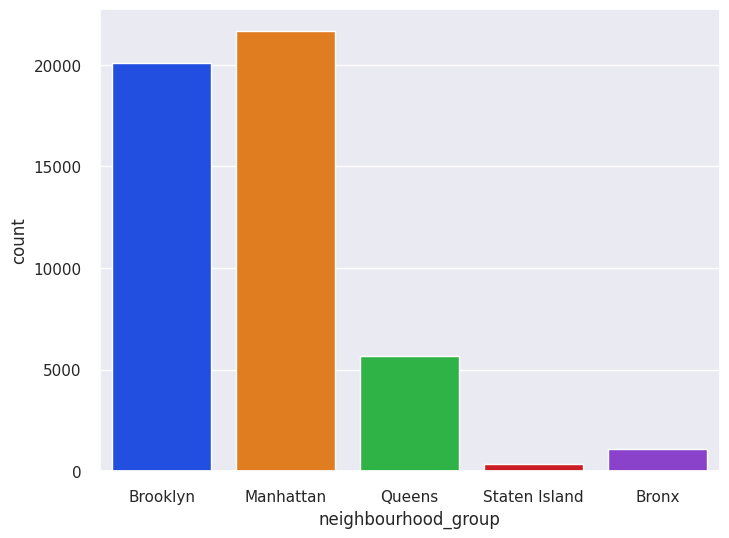

In [78]:
# ukuran grafik
plt.figure(figsize=(8, 6))

# neighbourhood_group
sns.countplot(x='neighbourhood_group', data=data_new, palette='bright')

# tampilkan grafik
plt.show()

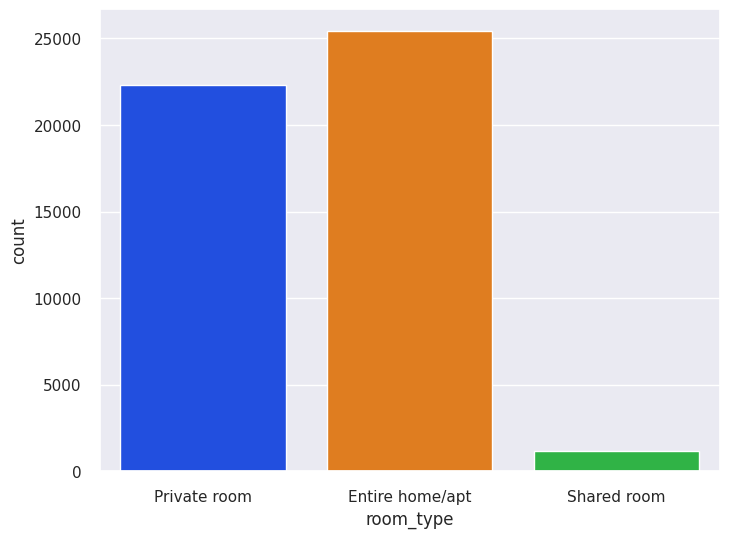

In [79]:
# ukuran grafik
plt.figure(figsize=(8, 6))

# room type
sns.countplot(x='room_type', data=data_new, palette='bright')

# tampilkan grafik
plt.show()

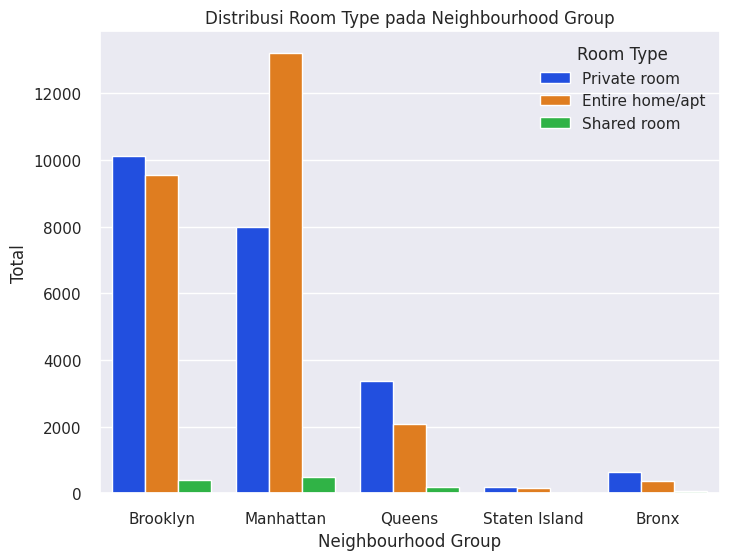

In [80]:
# grafik gabungan antara 'neighbourhood_group' dan 'room_type'
plt.figure(figsize=(8,6))
sns.countplot(data=data_new, x='neighbourhood_group', hue='room_type', palette='bright')
plt.title('Distribusi Room Type pada Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Total')
plt.legend(title='Room Type')

# save grafik
plt.savefig('/content/drive/MyDrive/Dataset/airbnb_graph/1_Distribusi Room Type pada Neighbourhood Group')
plt.show()

### **Visualisasi 'price_category', dengan 'neighbourhood_group', dan 'room_type'**

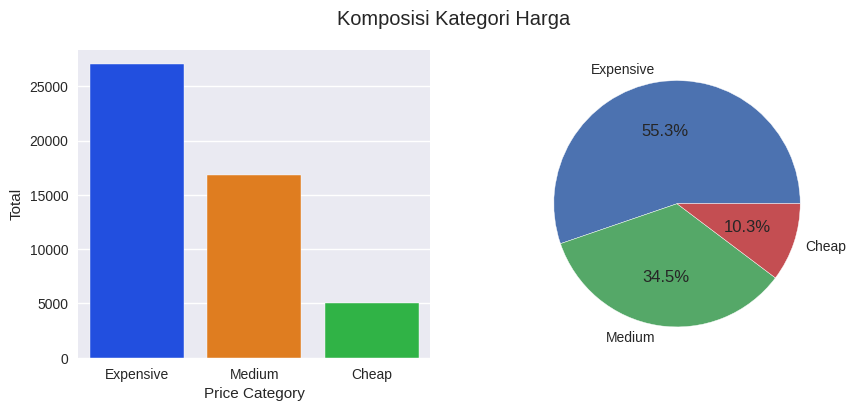

In [106]:
# ukuran grafik
plt.figure(figsize=(10,4))

# membuat dataframe baru untuk 'price_category'
price_category = data_new['price_category'].value_counts()
price_category = pd.DataFrame(price_category)
price_category.reset_index(inplace=True)

# mengubah nama kolom dataframe tersebut
price_category.columns = ['category', 'total']

# membuat size
size = list(price_category['total'])
label = list(price_category['category'])

# count plot
plt.subplot(1, 2, 1)
sns.countplot(data=data_new, x='price_category', palette='bright')
plt.xlabel('Price Category')
plt.ylabel('Total')

# pie chart
plt.subplot(1, 2, 2)
plt.pie(x=size, labels=label, autopct='%1.1f%%')

# judul utama
plt.suptitle('Komposisi Kategori Harga')

# save grafik
plt.savefig('/content/drive/MyDrive/Dataset/airbnb_graph/2_Komposisi Kategori Harga')

plt.show()

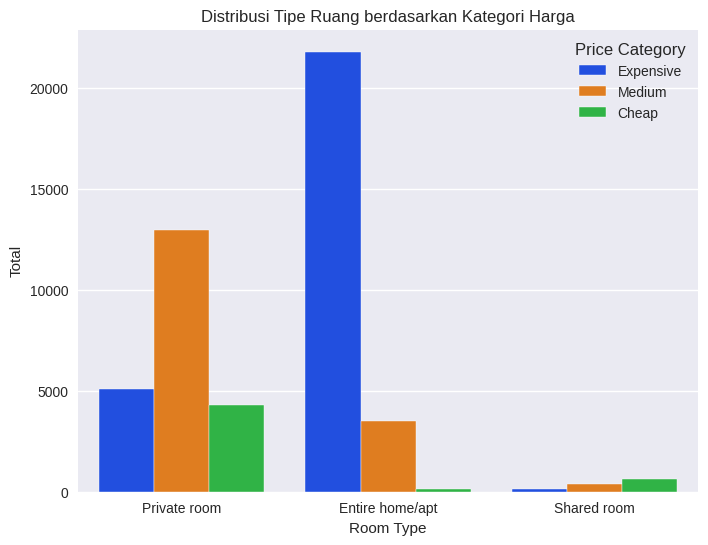

In [108]:
# grafik 'room_type' dan 'price_category'
plt.figure(figsize=(8,6))
sns.countplot(data=data_new, x='room_type', hue='price_category', palette='bright')
plt.title('Distribusi Tipe Ruang berdasarkan Kategori Harga')
plt.xlabel('Room Type')
plt.ylabel('Total')
plt.legend(title='Price Category')

# save grafik
plt.savefig('/content/drive/MyDrive/Dataset/airbnb_graph/3_Distribusi Tipe Ruang berdasarkan Kategori Harga')

plt.show()

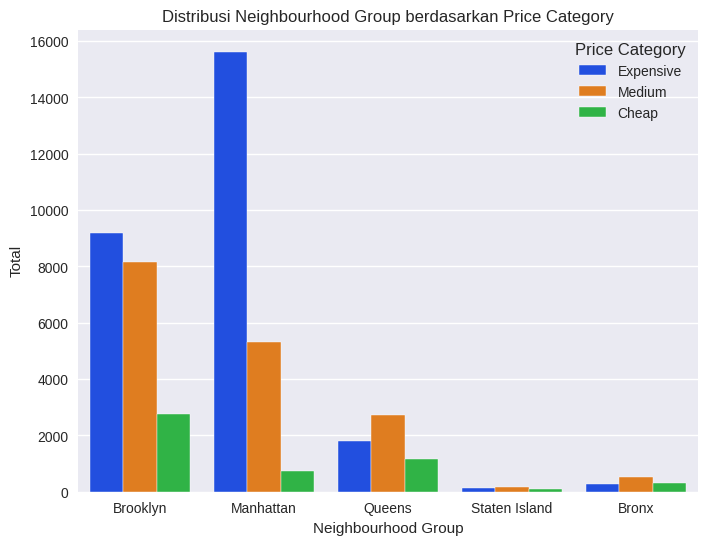

In [110]:
# grafik 'neighbourhood_group' dan 'price_category'
plt.figure(figsize=(8,6))
sns.countplot(data=data_new, x='neighbourhood_group', hue='price_category', palette='bright')
plt.title('Distribusi Neighbourhood Group berdasarkan Price Category')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Total')
plt.legend(title='Price Category')

# save grafik
plt.savefig('/content/drive/MyDrive/Dataset/airbnb_graph/4_Distribusi Neighbourhood Group berdasarkan Price Category')

plt.show()

### **Visualisasi 'number_of_reviews' dengan 'neighbourhood_group', 'room_type', dan 'price'**

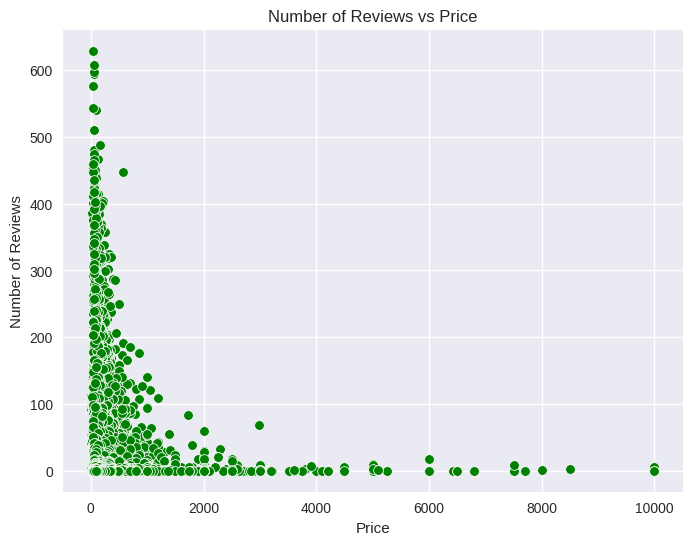

In [116]:
# scatterplot 'number_of_reviews' terhadap 'price'
plt.figure(figsize=(8,6))
sns.scatterplot(data=data_new, x='price', y='number_of_reviews', color='green')
plt.title('Number of Reviews vs Price')
plt.xlabel('Price')
plt.ylabel('Number of Reviews')

plt.savefig('/content/drive/MyDrive/Dataset/airbnb_graph/5_Number of Reviews vs Price')

plt.show()

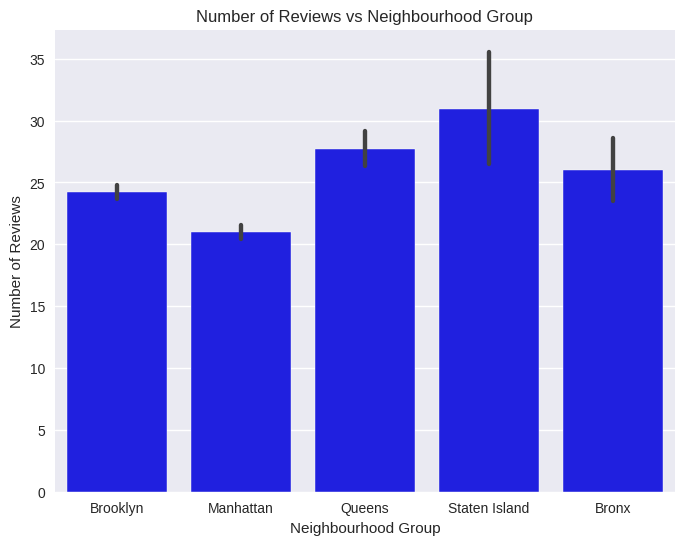

In [121]:
# 'number_of_reviews' terhadap 'neighbourhood_group'
plt.figure(figsize=(8,6))
sns.barplot(data=data_new, x='neighbourhood_group', y='number_of_reviews', color='blue')
plt.title('Number of Reviews vs Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Reviews')

plt.savefig('/content/drive/MyDrive/Dataset/airbnb_graph/6_Number of Reviews vs Neighbourhood Group')

plt.show()